In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

#crossvalidation Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lOADING THE DATA
hr_data = pd.read_excel(r'C:\Users\Arpita\Desktop\HR_Employee_Attrition.xlsx')

In [3]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#checking for null values
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

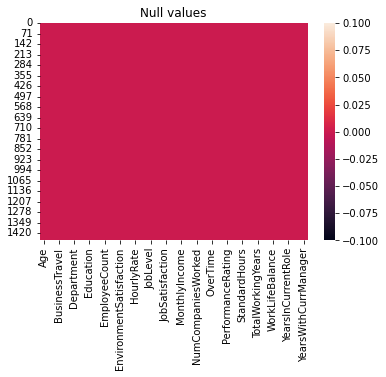

In [6]:
sns.heatmap(hr_data.isnull())
plt.title('Null values')
plt.show()

From above we can see that there are no missing values in the dataset.

In [7]:
#Checking skewness in the dataset
hr_data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

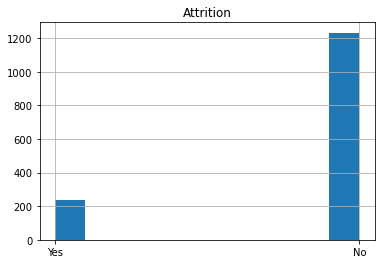

In [8]:
#Univariate Analysis

hr_data['Attrition'].hist(grid=True)
plt.title('Attrition')
plt.show()

# EDA

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
#Checking the structure of dataset
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

 We can see that there are some object values in the dataset.
    We have to predict the employee attrition, so we need to see which variables are contributing the most in attrition.
    We need to check correlation and we can make a seaborn heatmap of numeric factors and see the correlation.

In [11]:
hr_data_num = hr_data[['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate','YearsInCurrentRole','YearsSinceLastPromotion',                    
                       'JobInvolvement', 'JobLevel','YearsAtCompany','YearsWithCurrManager',
                       'JobSatisfaction', 'MonthlyIncome','MonthlyRate',
                       'RelationshipSatisfaction','NumCompaniesWorked','PercentSalaryHike',
                       'StockOptionLevel','PerformanceRating','TotalWorkingYears','WorkLifeBalance',
                        'TrainingTimesLastYear']].copy()
hr_data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,JobInvolvement,...,MonthlyIncome,MonthlyRate,RelationshipSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,PerformanceRating,TotalWorkingYears,WorkLifeBalance,TrainingTimesLastYear
0,41,1102,1,2,1,2,94,4,0,3,...,5993,19479,1,8,11,0,3,8,1,0
1,49,279,8,1,2,3,61,7,1,2,...,5130,24907,4,1,23,1,4,10,3,3
2,37,1373,2,2,4,4,92,0,0,2,...,2090,2396,2,6,15,0,3,7,3,3
3,33,1392,3,4,5,4,56,7,3,3,...,2909,23159,3,1,11,0,3,8,3,3
4,27,591,2,1,7,1,40,2,2,3,...,3468,16632,4,9,12,1,3,6,3,3


In [12]:
#Using Seaborn for correlation

hr_data_num.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,JobInvolvement,...,MonthlyIncome,MonthlyRate,RelationshipSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,PerformanceRating,TotalWorkingYears,WorkLifeBalance,TrainingTimesLastYear
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.212901,0.216513,0.029820,...,0.497855,0.028051,0.053535,0.299635,0.003634,0.037510,0.001904,0.680381,-0.021490,-0.019621
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.009932,-0.033229,0.046135,...,0.007707,-0.032182,0.007846,0.038153,0.022704,0.042143,0.000473,0.014515,-0.037848,0.002453
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.018845,0.010029,0.008783,...,-0.017014,0.027473,0.006557,-0.029251,0.040235,0.044872,0.027110,0.004628,-0.026556,-0.036942
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.060236,0.054254,0.042438,...,0.094961,-0.026084,-0.009118,0.126317,-0.011111,0.018422,-0.024539,0.148280,0.009819,-0.025100
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.008416,-0.009019,-0.006888,...,-0.014829,0.012648,-0.069861,-0.001251,-0.012944,0.062227,-0.020359,-0.014365,0.010309,0.023603
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,0.018007,0.016194,-0.008278,...,-0.006259,0.037600,0.007665,0.012594,-0.031701,0.003432,-0.029548,-0.002693,0.027627,-0.019359
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,-0.024106,-0.026716,0.042861,...,-0.015794,-0.015297,0.001330,0.022157,-0.009062,0.050263,-0.002172,-0.002334,-0.004607,-0.008548
YearsInCurrentRole,0.212901,0.009932,0.018845,0.060236,-0.008416,0.018007,-0.024106,1.000000,0.548056,0.008717,...,0.363818,-0.012815,-0.015123,-0.090754,-0.001520,0.050818,0.034986,0.460365,0.049856,-0.005738
YearsSinceLastPromotion,0.216513,-0.033229,0.010029,0.054254,-0.009019,0.016194,-0.026716,0.548056,1.000000,-0.024184,...,0.344978,0.001567,0.033493,-0.036814,-0.022154,0.014352,0.017896,0.404858,0.008941,-0.002067
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,0.008717,-0.024184,1.000000,...,-0.015271,-0.016322,0.034297,0.015012,-0.017205,0.021523,-0.029071,-0.005533,-0.014617,-0.015338


<function matplotlib.pyplot.show(close=None, block=None)>

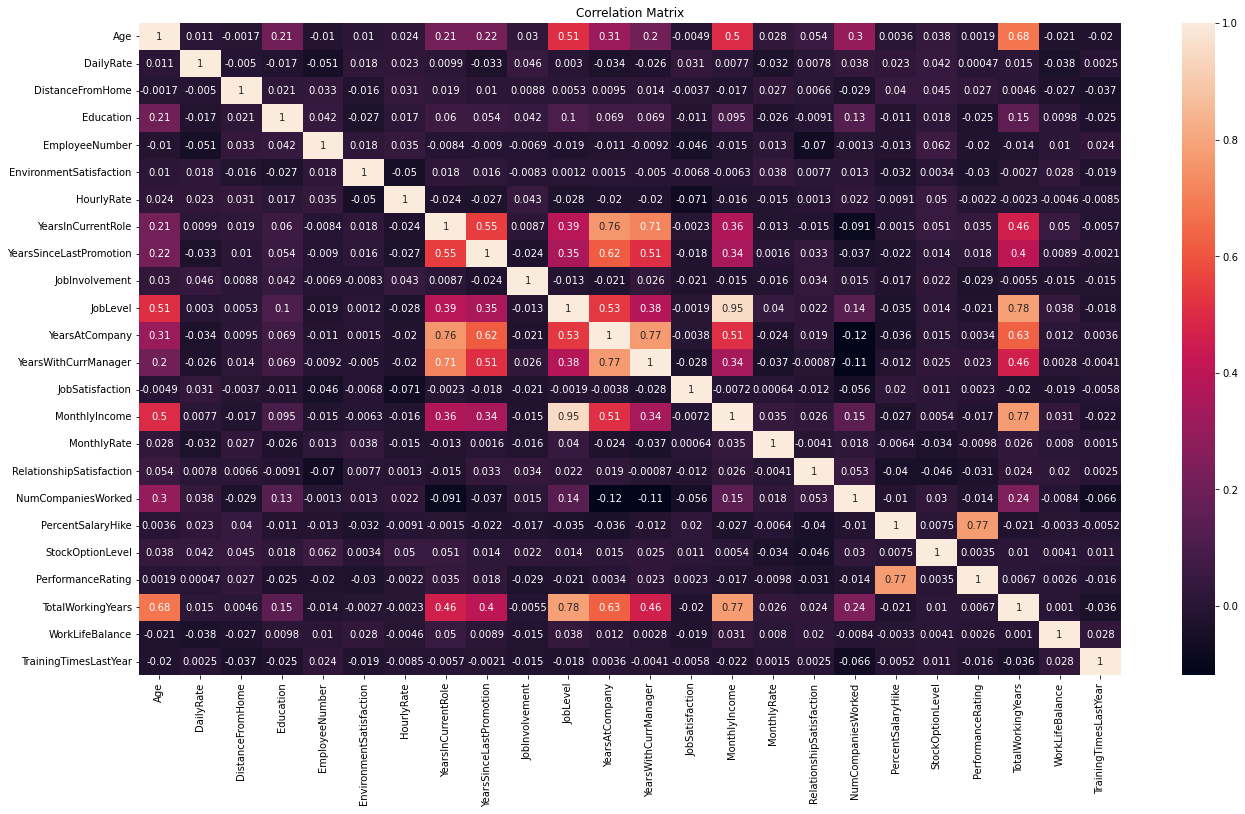

In [13]:
#Lets see the correlation by doing Bivariate Analysis

plt.figure(figsize=[22,12])
sns.heatmap(hr_data_num.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

From the above seaborn heatmap, we would now be able to see which factors are inadequately correlated and which ones are emphatically correlated.

In [14]:
#Let's remove the strongly correlated variables
hr_data_uc = hr_data_num[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

In [15]:
hr_data_uc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


Categorical variable and  any information about attritionboth are missing. Let’s combine those with above dataframe.

In [16]:
#Copy categorical data
hr_data_cat = hr_data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


# Replacing all the of Attrition with 1 and 0

In [17]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


# Now replacing all the other categorial variables with dummy variables

In [18]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


As of now we have all the data in numerical format, we can now combine both the above dataframes.

In [19]:
#Combining the above two through concat method

hr_data_final = pd.concat([hr_data_num, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,4,0,3,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,7,1,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,4,92,0,0,2,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,5,4,56,7,3,3,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,7,1,40,2,2,3,...,0,0,0,0,0,1,0,1,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

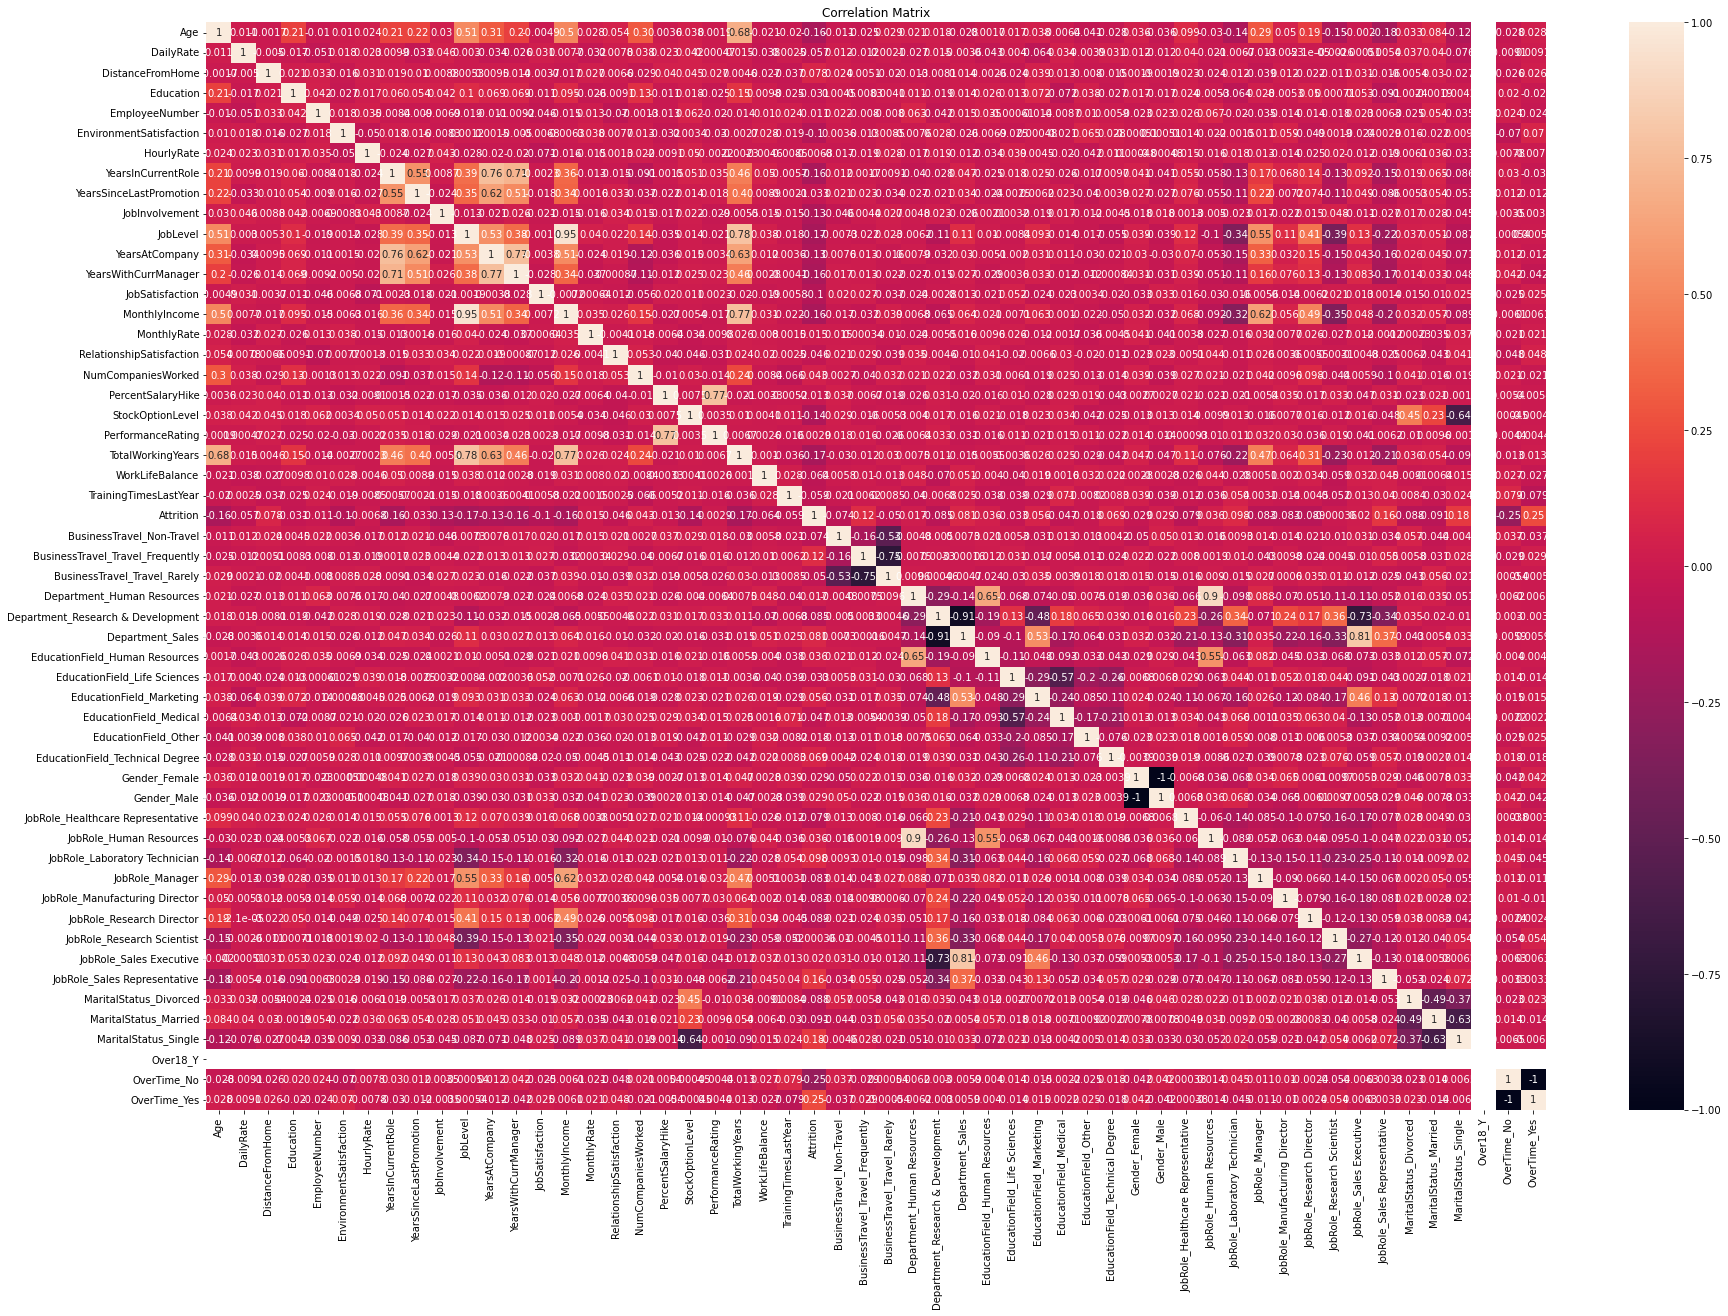

In [20]:
#Now lets again do some bivariate analysis and see what happened to the correlation matrix after encoding.
plt.figure(figsize=[30,20])
sns.heatmap(hr_data_final.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

In [21]:
hr_data_final.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EmployeeNumber                       0.016574
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion              1.984290
JobInvolvement                      -0.498419
JobLevel                             1.025401
YearsAtCompany                       1.764529
YearsWithCurrManager                 0.833451
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
RelationshipSatisfaction            -0.302828
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
StockOptionLevel                     0.968980
PerformanceRating                    1.921883
TotalWorkingYears                 

In [22]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(hr_data_final):
    # copy the dataframe
    df_scaled = hr_data_final.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(hr_data_final)

df_scaled

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.683333,0.735157,0.034483,0.4,0.000484,0.50,0.94,0.222222,0.000000,0.75,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.816667,0.186124,0.275862,0.2,0.000967,0.75,0.61,0.388889,0.066667,0.50,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.616667,0.915944,0.068966,0.4,0.001934,1.00,0.92,0.000000,0.000000,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.550000,0.928619,0.103448,0.8,0.002418,1.00,0.56,0.388889,0.200000,0.75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.450000,0.394263,0.068966,0.2,0.003385,0.25,0.40,0.111111,0.133333,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.533333,0.670447,0.068966,0.4,0.003868,1.00,0.79,0.388889,0.200000,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,0.983333,0.883256,0.103448,0.6,0.004836,0.75,0.81,0.000000,0.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,0.500000,0.905937,0.827586,0.2,0.005319,1.00,0.67,0.000000,0.000000,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,0.633333,0.144096,0.793103,0.6,0.005803,1.00,0.44,0.388889,0.066667,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,0.600000,0.866578,0.931034,0.6,0.006286,0.75,0.94,0.388889,0.466667,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Random State Selection

In [23]:
target =df_scaled['Attrition']
features = df_scaled.drop('Attrition', axis = 1)

from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,100):
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=.30, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(features_train,target_train)
    predrf=RFC.predict(features_test)
    acc=accuracy_score(target_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on Random_State',maxRS)

Best Accuracy is 0.9002267573696145 on Random_State 26


# Model Selection

In [24]:
# Using SVC
from sklearn.svm import SVC

target = df_scaled['Attrition']
features = df_scaled.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=26)

#Create the model and train
model = SVC()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.8809523809523809
[[504   0]
 [ 70  14]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       504
         1.0       1.00      0.17      0.29        84

    accuracy                           0.88       588
   macro avg       0.94      0.58      0.61       588
weighted avg       0.90      0.88      0.84       588



In [25]:
#Using Random Forest Classifier
target =df_scaled['Attrition']
features = df_scaled.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=26)

#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.8809523809523809
[[501   3]
 [ 67  17]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       504
         1.0       0.85      0.20      0.33        84

    accuracy                           0.88       588
   macro avg       0.87      0.60      0.63       588
weighted avg       0.88      0.88      0.85       588



<AxesSubplot:>

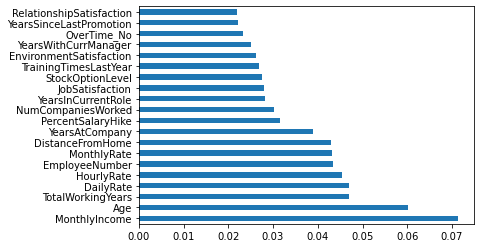

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [27]:
#Using MultinomialNB
from sklearn.naive_bayes import MultinomialNB

target = df_scaled['Attrition']
features = df_scaled.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=26)

#Create the model and train
model = MultinomialNB()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.8452380952380952
[[475  29]
 [ 62  22]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       504
         1.0       0.43      0.26      0.33        84

    accuracy                           0.85       588
   macro avg       0.66      0.60      0.62       588
weighted avg       0.82      0.85      0.83       588



In [28]:
#Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=26)

#Create the model and train
model = KNeighborsClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.8180272108843537
[[476  28]
 [ 79   5]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       504
           1       0.15      0.06      0.09        84

    accuracy                           0.82       588
   macro avg       0.50      0.50      0.49       588
weighted avg       0.76      0.82      0.78       588



In [29]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=26)

#Create the model and train
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

0.7925170068027211
[[438  66]
 [ 56  28]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       504
           1       0.30      0.33      0.31        84

    accuracy                           0.79       588
   macro avg       0.59      0.60      0.60       588
weighted avg       0.80      0.79      0.80       588



<AxesSubplot:>

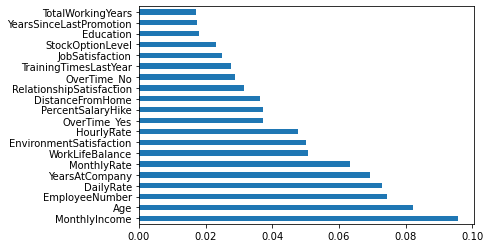

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

From the above we can conclude that the important factors that contribute in attrition are:

-  Monthly Income
-  Age
-  EmployeeNumber

# Cross Validation for Dataset

In [31]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(RandomForestClassifier(),features,target, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.8585034013605443


In [32]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(SVC(),features,target, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.8387755102040817


In [33]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(MultinomialNB(),features,target, cv=5)
print('Cross validation score of MultinomialNB model :',scr.mean())

Cross validation score of MultinomialNB model : 0.5197278911564627


In [34]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(DecisionTreeClassifier(),features,target, cv=5)
print('Cross validation score of DecisionTreeClassifier model :',scr.mean())

Cross validation score of DecisionTreeClassifier model : 0.7727891156462585


In [35]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(KNeighborsClassifier(),features,target, cv=5)
print('Cross validation score of KNeighborsClassifier model :',scr.mean())

Cross validation score of KNeighborsClassifier model : 0.8210884353741497


# GridSearch CV Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [44]:
#creating parameters list to pass in GridSearchCv

parameters = {'criterion':['gini', 'entropy'],'max_features':[2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]}

In [45]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [46]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14]})

In [47]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 6}

In [48]:
GCV_pred=GCV.best_estimator_.predict(X_test)

In [49]:
accuracy_score(y_test,GCV_pred)

0.7653061224489796

# Saving Best Model Using PKl

In [50]:
import joblib
filename = 'hr_model.pkl'
joblib.dump(GCV.best_estimator_, filename)

['hr_model.pkl']